In [1]:
pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

Processing ./mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose_hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=132356 sha256=c650357c0f84c356f67cec86d2b41492dae30c64663afbddb6d848a7c583fc50
  Stored in directory: /private/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/pip-ephem-wheel-cache-4wzzmsrt/wheels/77/c5/de/7a63a2c78a12ad335a5091a9209439e12d86616744464a5ae4
Successfully built mlrose_hiive
  Attempting uninstall: mlrose_hiive
    Found existing installation: mlrose_hiive 2.2.4
    Uninstalling mlrose_hiive-2.2.4:
      Successfully uninstalled mlrose_hiive-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
"""
# C1 tuned
def border_swap(problem, next_gen, child, schedule):
    if schedule is None:
        print("order is none.")
        return next_gen
    if len(next_gen) == 0:
        next_gen.append(child)
    else:
        for i in schedule:
            if schedule[i] == -1 and i < len(schedule) - 1:
                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]
        temp_schedule = [i for i in schedule if i != -1]
        # check if the switched work better
        if problem.eval_fitness(temp_schedule) >= problem.eval_fitness(child):
            next_gen.append(temp_schedule)
        else:
            next_gen.append(child)
    return next_gen

"""

'\n# C1 tuned\ndef border_swap(problem, next_gen, child, schedule):\n    if schedule is None:\n        print("order is none.")\n        return next_gen\n    if len(next_gen) == 0:\n        next_gen.append(child)\n    else:\n        for i in schedule:\n            if schedule[i] == -1 and i < len(schedule) - 1:\n                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]\n        temp_schedule = [i for i in schedule if i != -1]\n        # check if the switched work better\n        if problem.eval_fitness(temp_schedule) >= problem.eval_fitness(child):\n            next_gen.append(temp_schedule)\n        else:\n            next_gen.append(child)\n    return next_gen\n\n'

In [3]:
import mlrose_hiive as mh

In [4]:
#help(mh.runners)

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/ipykernel_8045/1000570959.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


In [2]:
import pandas as pd
import utility as u
import importlib

In [7]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [8]:
size = 108
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [9]:
with open("108_tasks.txt", "a") as f:
    for t in tasks:
        print(t.task_id, t.duration, t.deadline, t.profit, file=f)

In [10]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [11]:
problem_ffp.length

108

In [12]:
problem_ffp.fitness

245.0

In [13]:
# GA runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[40, 50, 60],
              mutation_rates=[0.07, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [14]:
df_run_curves_ffp.shape

(12251, 7)

In [15]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.004886,274.0,0.0,40,0.07,2048
1,1,0.031352,376.0,80.0,40,0.07,2048
2,2,0.060041,381.0,160.0,40,0.07,2048
3,3,0.091093,396.0,240.0,40,0.07,2048
4,4,0.120461,396.0,319.0,40,0.07,2048


In [16]:
df_run_curves_ffp['Fitness'].max()

928.0

In [17]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
5973,1918,37.294121,928.0,190016.0,50,0.07,2048
5974,1919,37.306899,928.0,190115.0,50,0.07,2048
5975,1920,37.319297,928.0,190214.0,50,0.07,2048
5976,1921,37.330942,928.0,190313.0,50,0.07,2048
5977,1922,37.344259,928.0,190412.0,50,0.07,2048
...,...,...,...,...,...,...,...
6099,2044,0.487024,928.0,202490.0,50,0.07,2048
6100,2045,0.499626,928.0,202589.0,50,0.07,2048
6101,2046,0.511881,928.0,202688.0,50,0.07,2048
6102,2047,0.523373,928.0,202787.0,50,0.07,2048


In [18]:
# need to check Time and FEvals

In [19]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [20]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
5973,1918,37.294121,928.0,190016.0,50,0.07,2048
5974,1919,37.306899,928.0,190115.0,50,0.07,2048
5975,1920,37.319297,928.0,190214.0,50,0.07,2048
5976,1921,37.330942,928.0,190313.0,50,0.07,2048
5977,1922,37.344259,928.0,190412.0,50,0.07,2048
...,...,...,...,...,...,...,...
6099,2044,0.487024,928.0,202490.0,50,0.07,2048
6100,2045,0.499626,928.0,202589.0,50,0.07,2048
6101,2046,0.511881,928.0,202688.0,50,0.07,2048
6102,2047,0.523373,928.0,202787.0,50,0.07,2048


In [21]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,50,0.07,190016.0,1983.0,0.001638


In [22]:
# tentatively, pick pop size = 50 and mutation_rate = 0.07, as the only choice

In [23]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.004886,274.0,0.0,40,0.07,2048
1,1,0.031352,376.0,80.0,40,0.07,2048
2,2,0.060041,381.0,160.0,40,0.07,2048
3,3,0.091093,396.0,240.0,40,0.07,2048
4,4,0.120461,396.0,319.0,40,0.07,2048


In [24]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [25]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[50], # 20 bits in total
              mutation_rates=[0.07])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [26]:
df_iter_curves_ffp.shape

(19744, 7)

In [27]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.007237,274.0,0.0,50,0.07,2048
1,1,0.053196,400.0,100.0,50,0.07,2048
2,2,0.089571,400.0,199.0,50,0.07,2048
3,3,0.126470,410.0,299.0,50,0.07,2048
4,4,0.153463,417.0,399.0,50,0.07,2048


In [28]:
df_iter_curves_ffp.Fitness.max()

928.0

In [3]:
#df_iter_curves_ffp.to_csv('gab_mutate_tuned_C1_js_108.csv')
import pandas as pd
df_iter_curves_ffp = pd.read_csv('../../csv-files/gab_mutate_tuned_C1_js_108.csv')

In [30]:
df_iter_curves_ffp.Iteration.max()

2048

In [4]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [32]:
df_fitness_iter_ffp.shape

(2049, 3)

In [33]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,316.3,1212.011111
1,1,389.5,116.055556
2,2,395.8,231.066667
3,3,401.2,321.288889
4,4,407.5,301.833333


In [34]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

1918    1918
1919    1919
1920    1920
1921    1921
1922    1922
        ... 
2044    2044
2045    2045
2046    2046
2047    2047
2048    2048
Name: Iteration, Length: 131, dtype: int64

In [35]:
# converge point-never converged
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

nan

In [5]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [37]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,316.3,1212.011111,34.813950
1,1,389.5,116.055556,10.772908
2,2,395.8,231.066667,15.200877
3,3,401.2,321.288889,17.924533
4,4,407.5,301.833333,17.373351


Text(0, 0.5, 'Fitness')

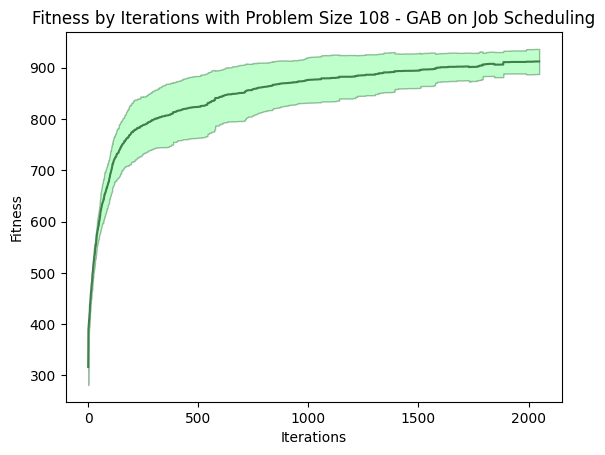

In [38]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title(f'Fitness by Iterations with Problem Size {size} - GAB on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [6]:
# elbow analysis
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, S=1.0, curve="concave", direction="increasing")

print(kneedle.knee)

147


In [7]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration'] == kneedle.knee]

,Iteration,avg_fitness,var_fitness,stddev_fitness
147,147,744.0,2538.444444,50.382978


In [39]:
df_fitness_iter_ffp.avg_fitness.max()

912.0

In [40]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

61.675134553742325

In [41]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(355    355
 356    356
 Name: Iteration, dtype: int64,)

In [42]:
# Fevals - iteration

In [2]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [3]:
df_FEvals_iter_ffp.avg_FEvals.max()

202859.66666666666

In [44]:
df_FEvals_iter_ffp.shape

(2049, 3)

In [45]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,99.9,0.100000
2,2,199.2,0.400000
3,3,298.6,0.711111
4,4,398.3,0.455556


In [46]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [47]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 16.2808681177254)

In [48]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,99.9,0.100000,0.316228
2,2,199.2,0.400000,0.632456
3,3,298.6,0.711111,0.843274
4,4,398.3,0.455556,0.674949


Text(0, 0.5, 'FEvals')

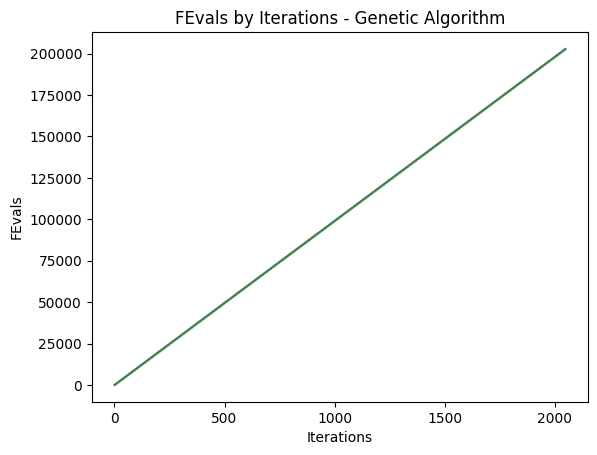

In [49]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [50]:
# fitness - wall clock time

In [51]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [52]:
df_time_iter_ffp.shape

(2049, 3)

In [53]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.003171,0.000002
1,1,0.027520,0.000101
2,2,0.052468,0.000252
3,3,0.078548,0.000461
4,4,0.099049,0.000605


In [54]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [55]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.003171,0.000002,0.001513
1,1,0.027520,0.000101,0.010063
2,2,0.052468,0.000252,0.015869
3,3,0.078548,0.000461,0.021463
4,4,0.099049,0.000605,0.024599


Text(0, 0.5, 'Time')

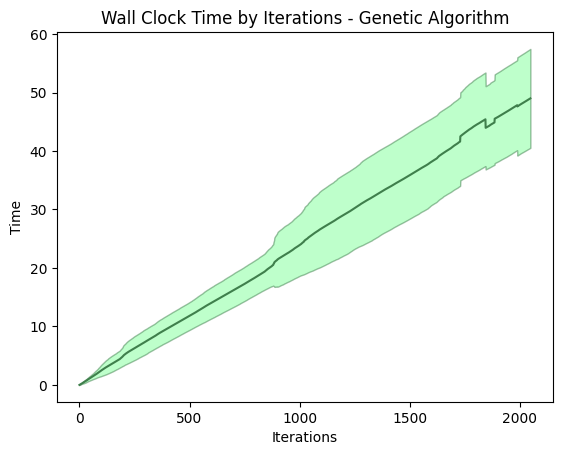

In [56]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [57]:
df_time_iter_ffp.stddev_time.max()

8.458005045373621

In [58]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

2048    2048
Name: Iteration, dtype: int64

In [59]:
df_time_iter_ffp.avg_time.max()

48.99749870234518